# Interpolação

É uma aproximação dos pontos que tocam um função f(x).

## Importações

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Método de Interpolação de Lagrange

O método de Lagrange é usado para calcular um polinômio que passa por três pontos para três funções polinomiais distintas, onde cada função Li(x) corresponde a cada um dos pontos (xi, yi).

In [ ]:
def lagrange(x, y, p):
  S = 0
  for i in range(len(x)):
    L = 1
    for j in range(len(x)):
      if i != j:
        L *= (p - x[j]) / (x[i] - x[j])
    S += y[i] * L
  return S

x = np.array([1.3, 1.8, 2.6, 3.9])
y = np.array([3.2, 4.3, 0.5, -1.7])
p = 1.3

print(lagrange(x, y, p))

3.2


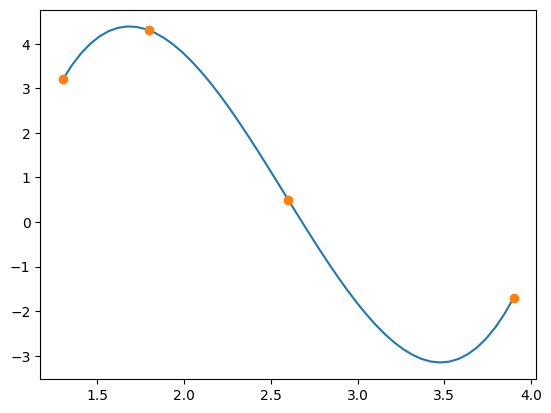

In [ ]:
p = np.linspace(x[0], x[-1], 50)
values = [lagrange(x, y, i) for i in p]
plt.plot(p, values)
plt.plot(x, y, 'o')
plt.show()

## Método de Interpolação de Newton

O método de Newton é utilizado para calcular um polinômio de n + 1 pontos. Utilizamos o polinômio que já temos (para n pontos) e adicionamos um novo termo.

In [ ]:
def tabelaDifDivididas(x, y):
  n = len(x)
  T = np.zeros((n, n))
  T[:, 0] = y
  for j in range(1, n):
    for i in range(n - j):
      T[i, j] = (T[i + 1, j - 1] - T[i, j - 1]) / (x[i + j] - x[i])
  return T

def interpolacaoNewton(x, y, p):
  n = len(x)
  T = tabelaDifDivididas(x, y)
  S = T[0, 0]
  M = 1.0
  for i in range(1, n):
    M *= (p - x[i - 1])
    S += M * T[0, i]
  return S

x = np.array([0.54, 4, 8, 11])
y = np.array([0.84, 2, -1.16, 6])
p = 10.12

print(interpolacaoNewton(x, y, p))

2.39311016815273


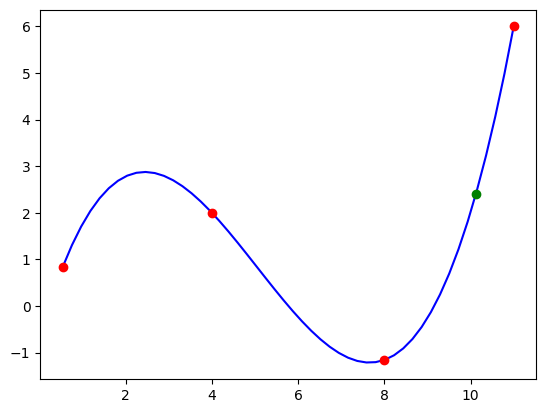

In [ ]:
p_interpolacao = 10.12
valor_interpolado = interpolacaoNewton(x, y, p_interpolacao)

p = np.linspace(x[0], x[-1], 50)
values = [interpolacaoNewton(x, y, i) for i in p]

plt.plot(p, values, color="blue")
plt.plot(x, y, 'ro', zorder=5)
plt.plot(p_interpolacao, valor_interpolado, 'go', zorder=6)

plt.show()